In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/stud_data.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [29]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Gender - male/female

Race/Ethnicity - 'group B', 'group C', 'group A', 'group D', 'group E'

Parental Level Of Education - "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'

Lunch - 'standard', 'free/reduced'

Test Prep Course - 'none', 'completed'

Missing Values Checking

In [22]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Missing values

Check for duplicates

In [24]:
df.duplicated().sum()

0

No Duplicates present

Checking the number of unique values in each column

In [25]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print(numeric_features)
print(categorical_features)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['avg_score'] = df['total_score']/3

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [42]:
reading_full = df[df['reading score']==100]['avg_score'].count()
writing_full = df[df['writing score']==100]['avg_score'].count()
math_full = df[df['math score']==100]['avg_score'].count()

print("No of students having full marks in maths = ", math_full)
print("No of students having full marks in reading = ", reading_full)
print("No of students having full marks in writing = ", writing_full)

No of students having full marks in maths =  7
No of students having full marks in reading =  17
No of students having full marks in writing =  14


In [43]:
reading_fail = df[df['reading score']<=20]['avg_score'].count()
writing_fail = df[df['writing score']<=20]['avg_score'].count()
math_fail = df[df['math score']<=20]['avg_score'].count()

print("No of students having fail marks in maths = ", math_fail)
print("No of students having fail marks in reading = ", reading_fail)
print("No of students having fail marks in writing = ", writing_fail)

No of students having fail marks in maths =  4
No of students having fail marks in reading =  1
No of students having fail marks in writing =  3


DATA VISUALIZATION

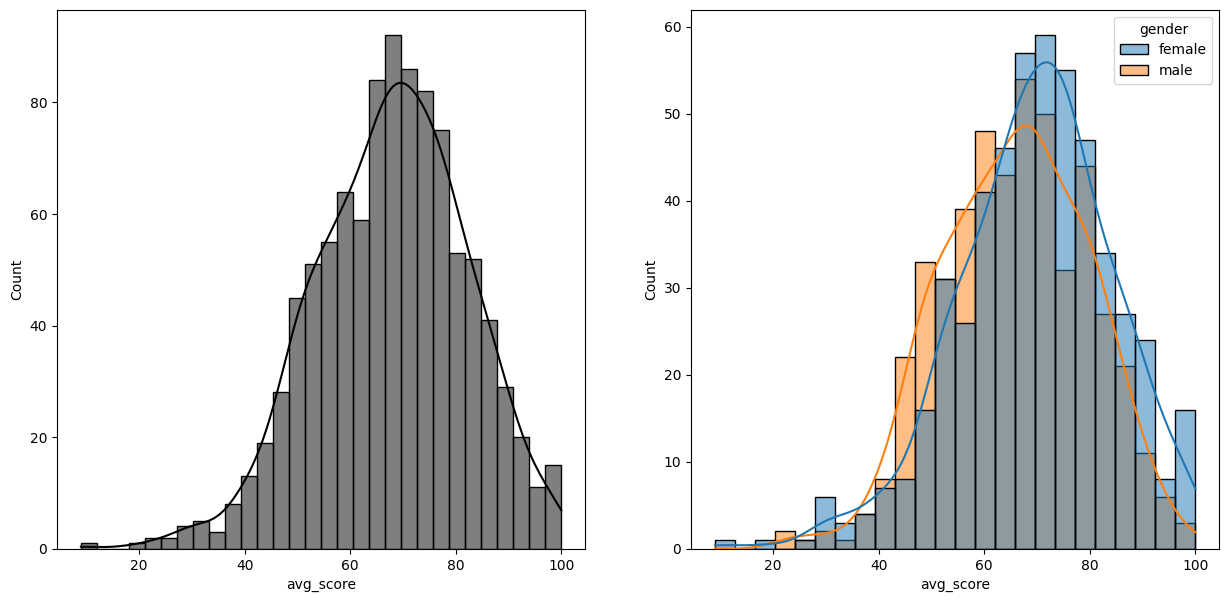

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'avg_score', bins = 30, kde = True, color='black')

plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', kde = True, hue='gender')

plt.show()

Insight : Girls perform well than boys 

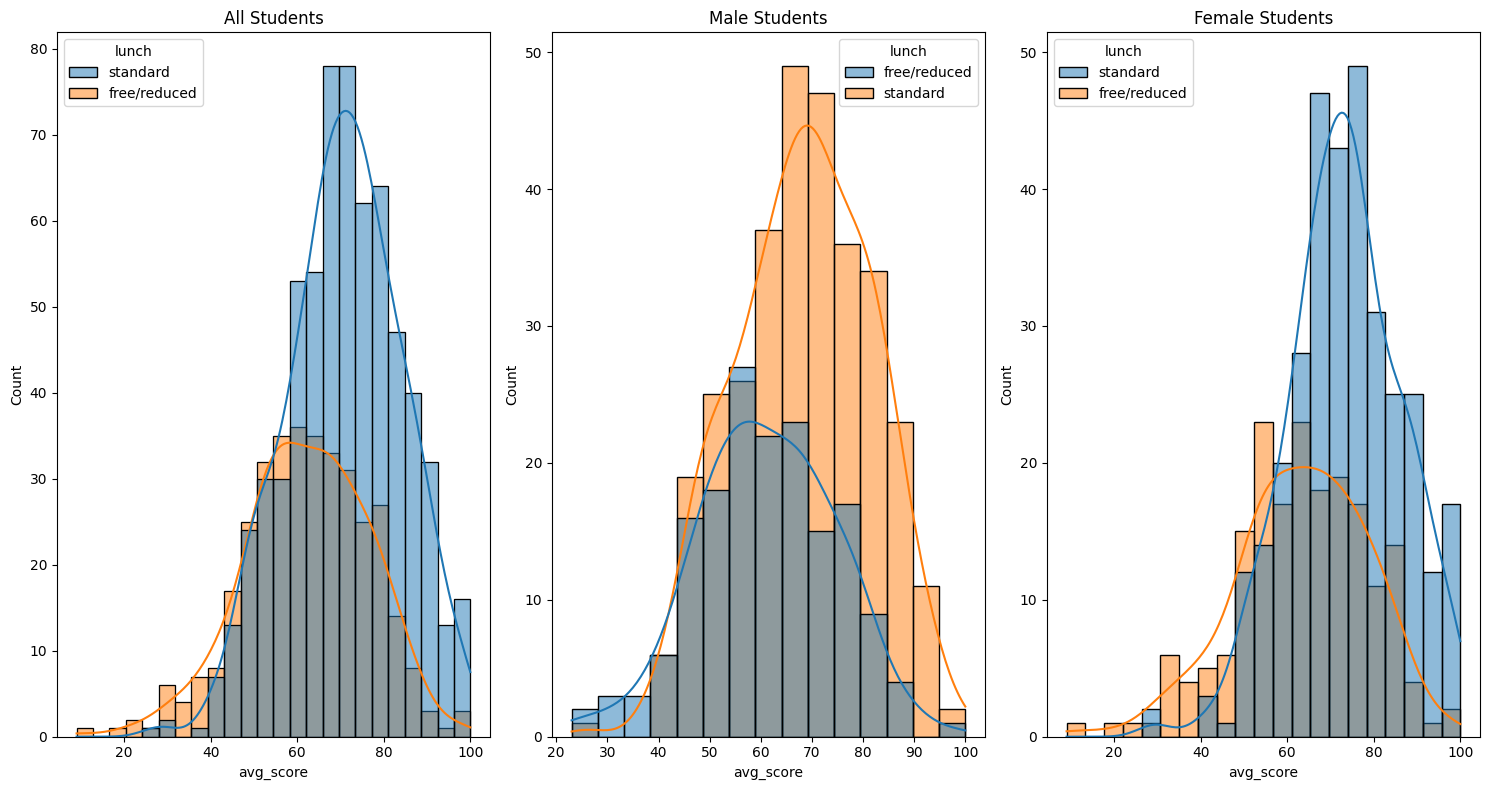

In [58]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize = (15,8))

plt.subplot(131)
sns.histplot(data=df, x='avg_score', kde=True, hue='lunch')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x = 'avg_score', kde=True, hue='lunch')
plt.title('Male Students')

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x = 'avg_score', kde=True, hue='lunch')
plt.title('Female Students')

plt.tight_layout()
plt.show()

Insights:
Students who opted for standard meals performed better than those students who opted for free meals, in both boys and girls.

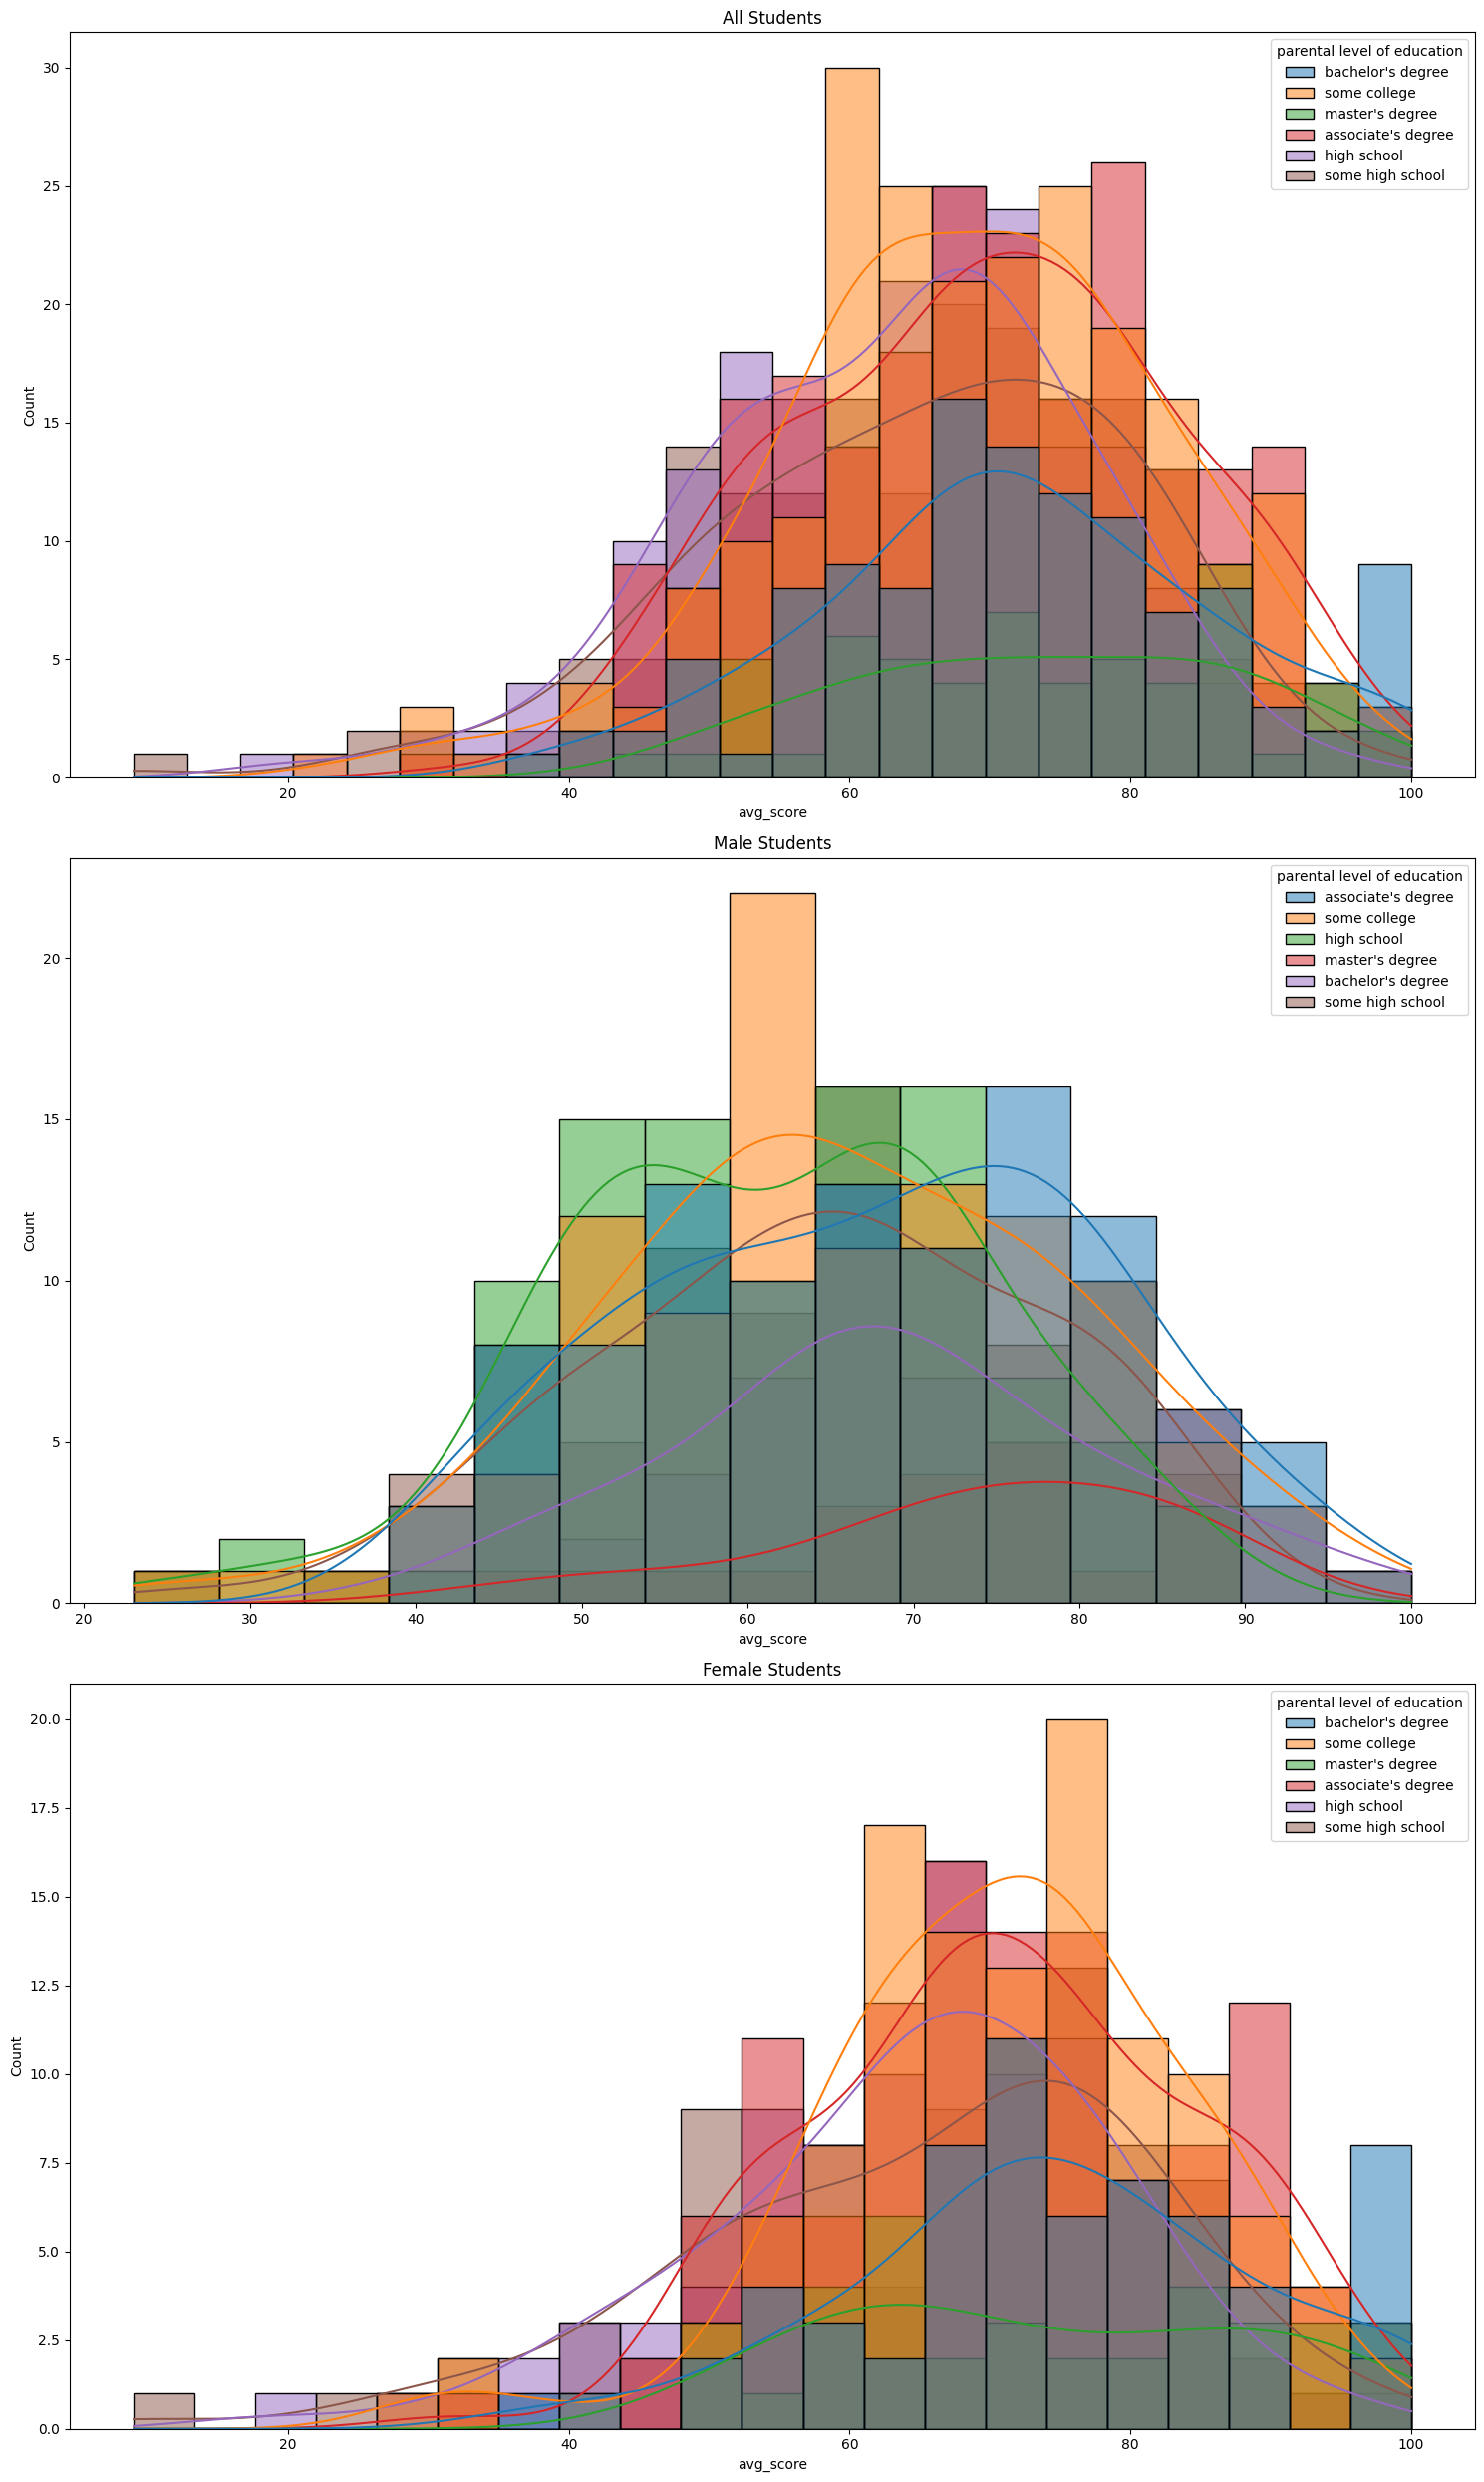

In [63]:
fig,axs = plt.subplots(nrows=3, ncols=1, figsize = (15,25))

plt.subplot(311)
sns.histplot(data=df, x='avg_score', kde=True, hue='parental level of education')
plt.title('All Students')

plt.subplot(312)
sns.histplot(data=df[df['gender']=='male'], x = 'avg_score', kde=True, hue='parental level of education')
plt.title('Male Students')

plt.subplot(313)
sns.histplot(data=df[df['gender']=='female'], x = 'avg_score', kde=True, hue='parental level of education')
plt.title('Female Students')

plt.tight_layout()
plt.show()

In General...There is no such correlation between parental education and marks.

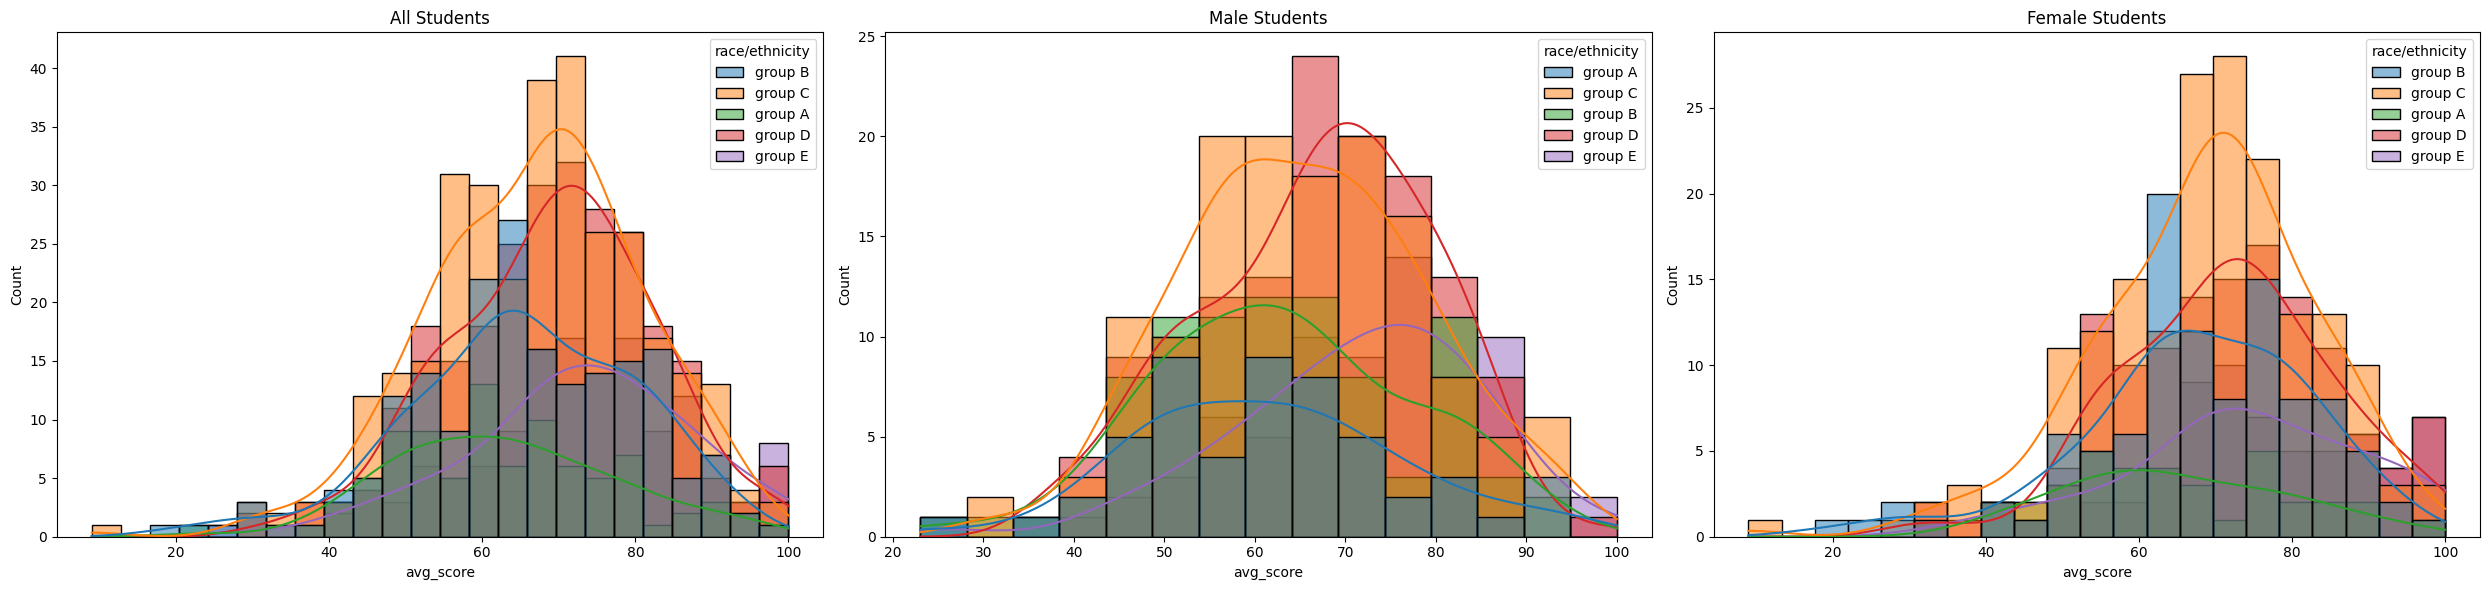

In [65]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
plt.title('All Students')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.title('Male Students')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.title('Female Students')

plt.tight_layout()
plt.show()

Group C students generally perform well. Group A and Group B don't perform well in both boys and girls.

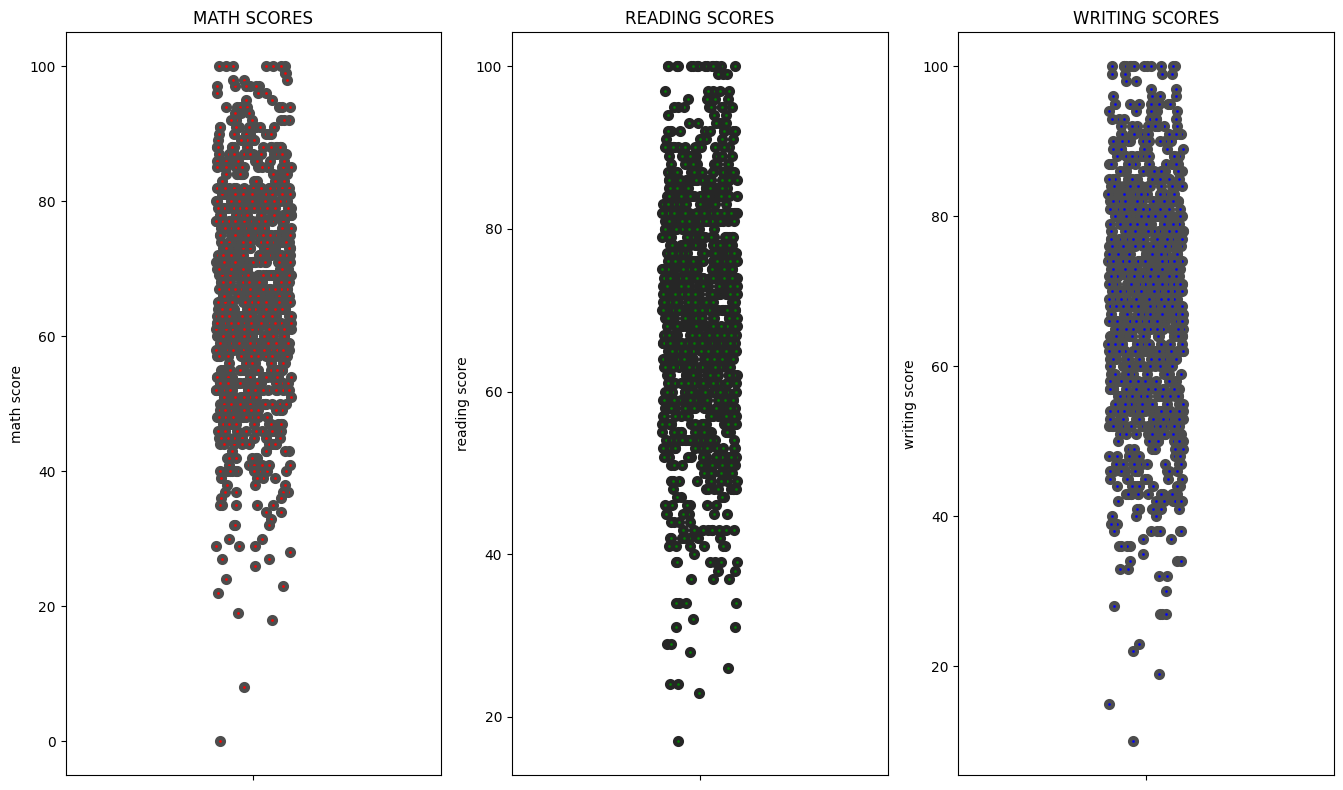

In [69]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.stripplot(y='math score',data=df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.stripplot(y='reading score',data=df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.stripplot(y='writing score',data=df,color='blue',linewidth=3)

plt.tight_layout()
plt.show()

All three subjects have maximum probability of their scores between 50 and 80

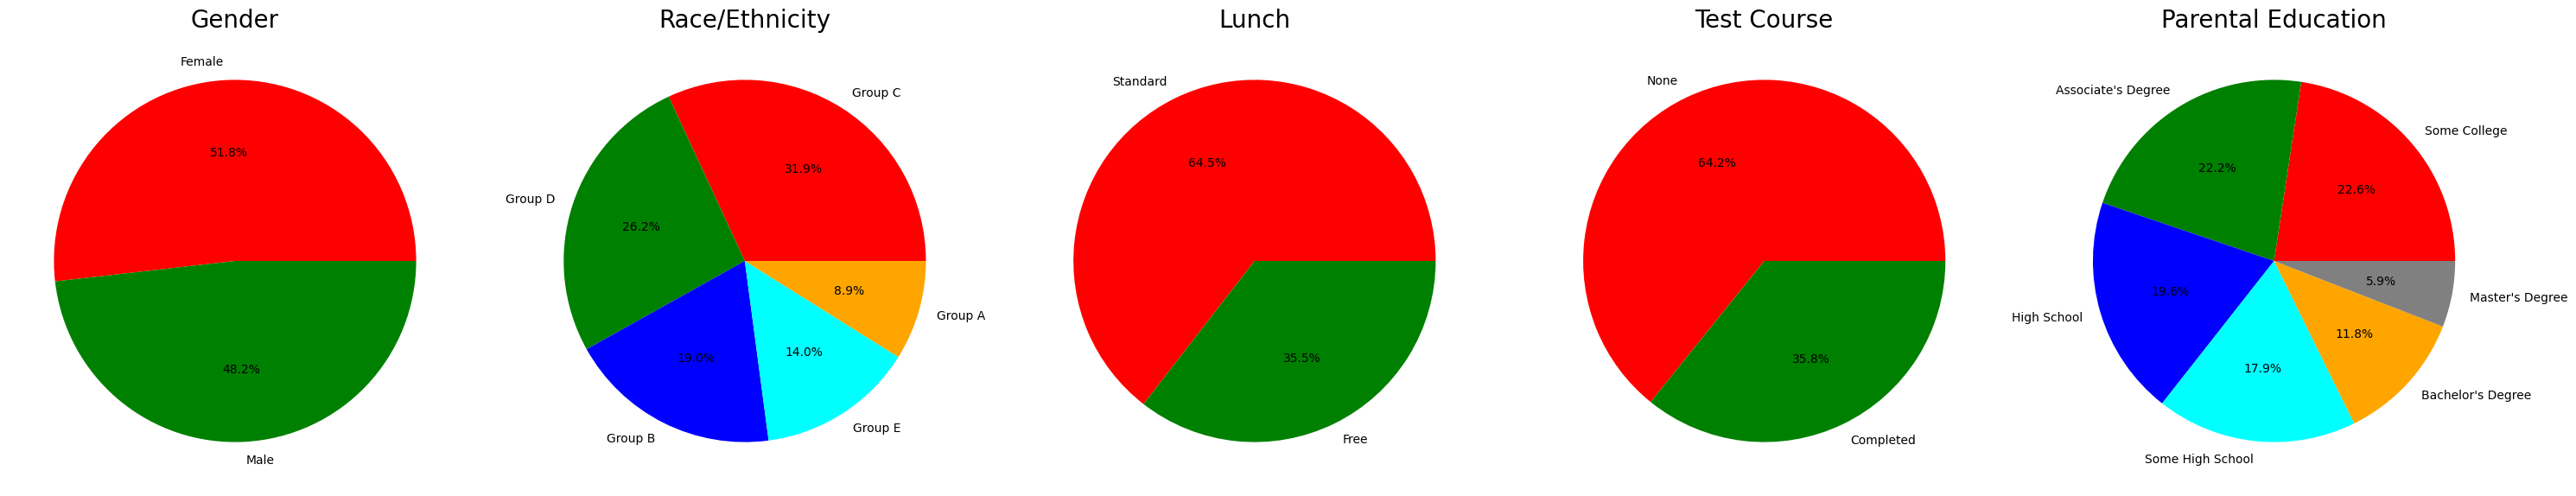

In [89]:
plt.rcParams['figure.figsize'] = (30, 12)

#Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#Race / Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

#Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#Test Preparation course
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

#Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

Univariate and Bivariate analysis of Gender with marks

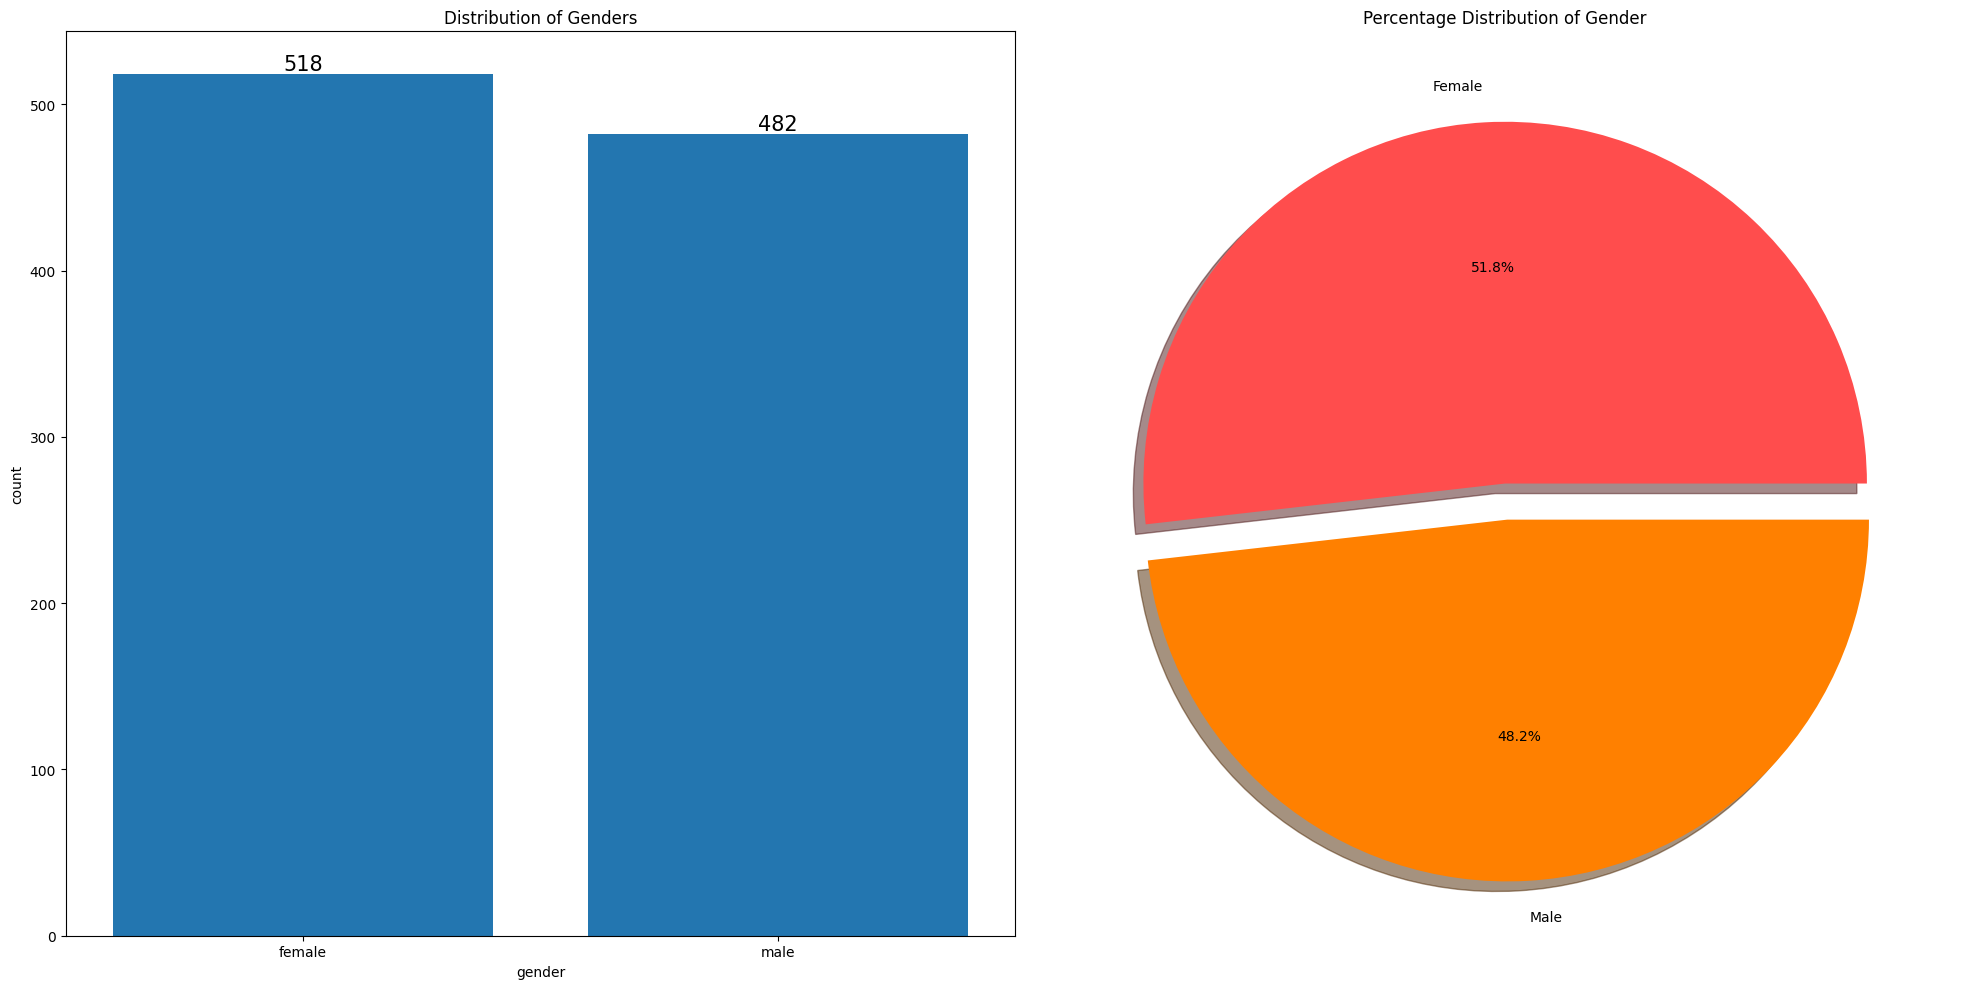

In [91]:
#Univariate analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Genders')
sns.countplot(data=df, x='gender', saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Gender')
plt.pie(x=df['gender'].value_counts(), data=df, labels=['Female', 'Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])

plt.tight_layout()
plt.show()

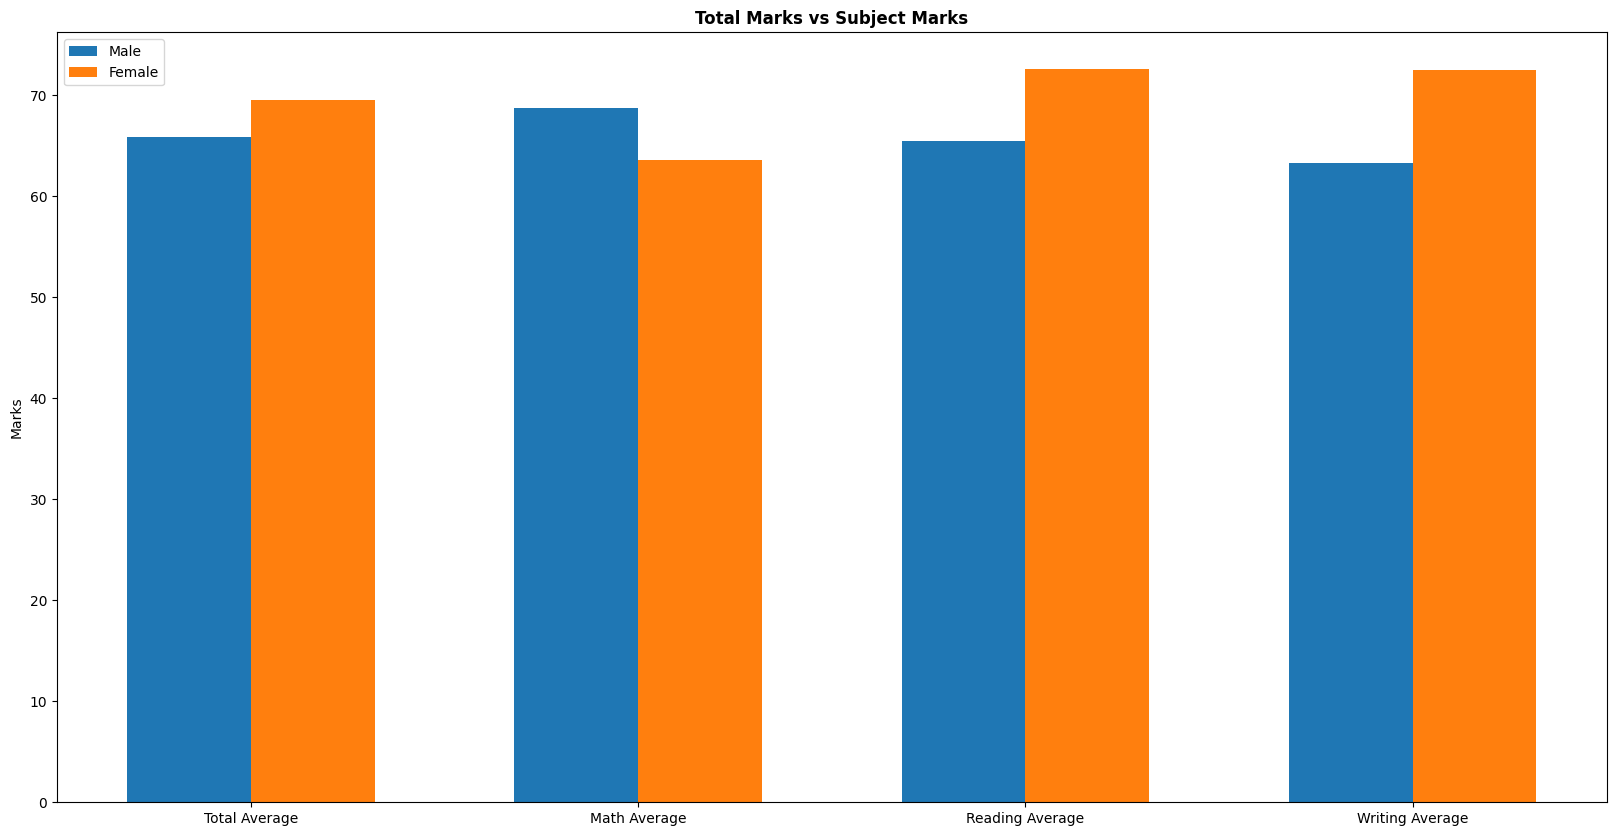

In [123]:
#Bivariate analysis
gender_group = df.groupby('gender')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

female_scores = [gender_group['avg_score'].mean()[0], gender_group['math score'].mean()[0], gender_group['reading score'].mean()[0], gender_group['writing score'].mean()[0]]
male_scores = [gender_group['avg_score'].mean()[1], gender_group['math score'].mean()[1], gender_group['reading score'].mean()[1], gender_group['writing score'].mean()[1]]

X_axis = np.arange(len(X))*2.5
plt.bar(X_axis - 0.4, male_scores, label='Male')
plt.bar(X_axis + 0.4, female_scores, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Females score more than males in total, reading and writing, whereas males score more in maths

Univariate and Bivariate analysis of race with marks

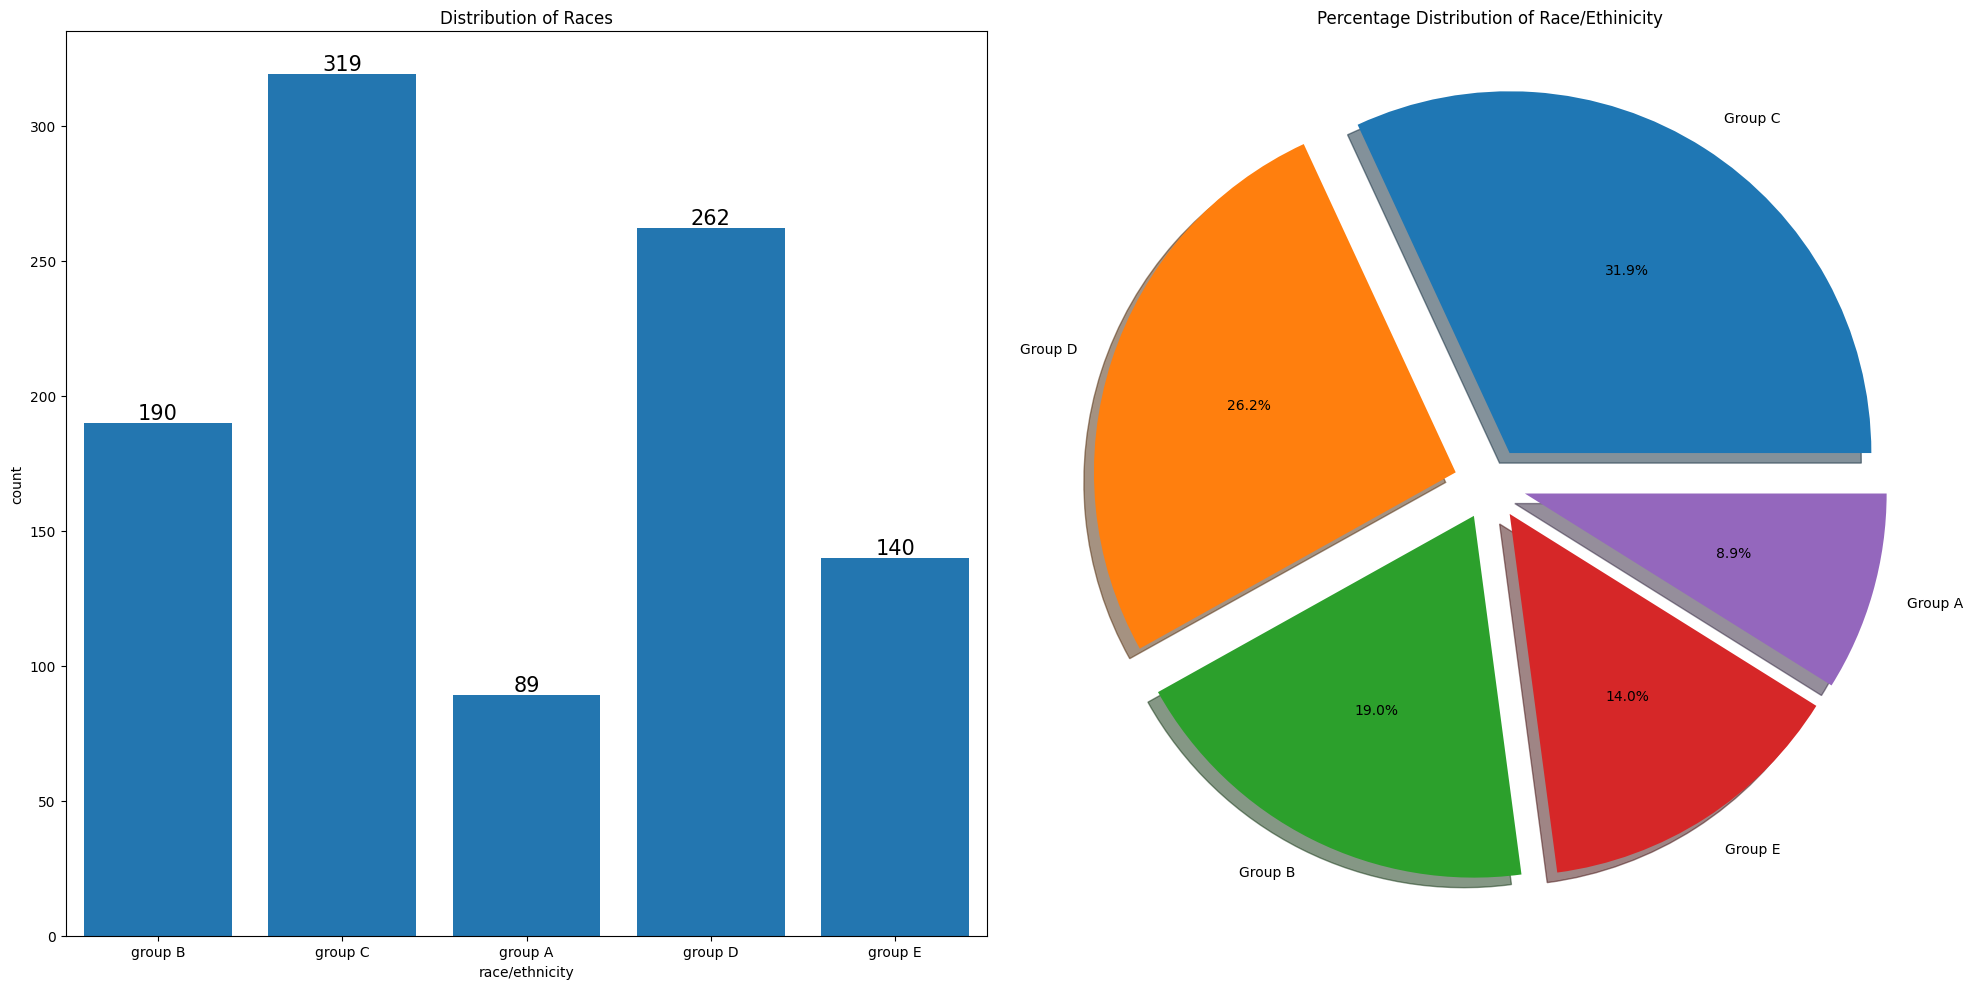

In [134]:
#Univariate analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

plt.subplot(121)
plt.title('Distribution of Races')
sns.countplot(data=df, x=df['race/ethnicity'], saturation=0.95, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

plt.subplot(122)
plt.title('Percentage Distribution of Race/Ethinicity')
plt.pie(x=df['race/ethnicity'].value_counts(), data=df, labels=['Group C', 'Group D', 'Group B', 'Group E', 'Group A'],explode=[0.1, 0.1, 0.1, 0.1, 0.1],autopct='%1.1f%%',shadow=True)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

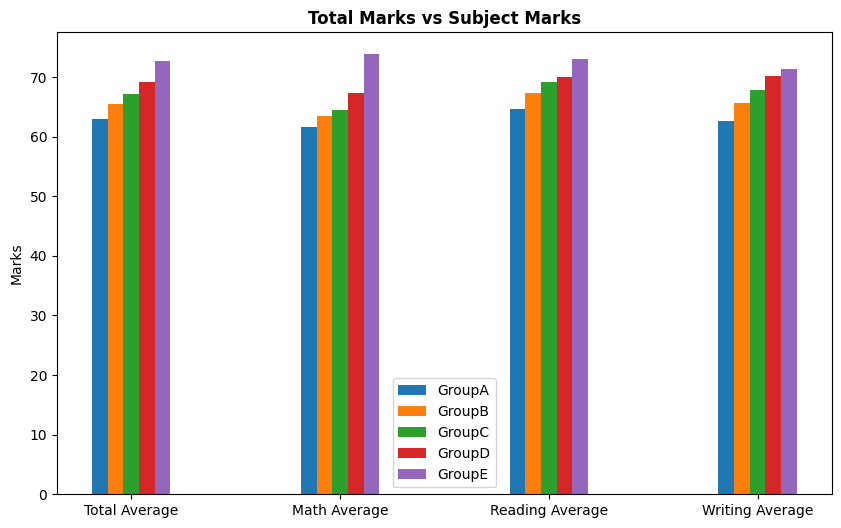

In [140]:
#Bivariate analysis
racial_group = df.groupby('race/ethnicity')

plt.figure(figsize=(20,10))

X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']

groupA_scores = [racial_group['avg_score'].mean()[0], racial_group['math score'].mean()[0], racial_group['reading score'].mean()[0], racial_group['writing score'].mean()[0]]
groupB_scores = [racial_group['avg_score'].mean()[1], racial_group['math score'].mean()[1], racial_group['reading score'].mean()[1], racial_group['writing score'].mean()[1]]
groupC_scores = [racial_group['avg_score'].mean()[2], racial_group['math score'].mean()[2], racial_group['reading score'].mean()[2], racial_group['writing score'].mean()[2]]
groupD_scores = [racial_group['avg_score'].mean()[3], racial_group['math score'].mean()[3], racial_group['reading score'].mean()[3], racial_group['writing score'].mean()[3]]
groupE_scores = [racial_group['avg_score'].mean()[4], racial_group['math score'].mean()[4], racial_group['reading score'].mean()[4], racial_group['writing score'].mean()[4]]

X_axis = np.arange(len(X)) * 2
bar_width = 0.15 

plt.figure(figsize=(10, 6))
plt.bar(X_axis - 2 * bar_width, groupA_scores, width=bar_width, label='GroupA')
plt.bar(X_axis - bar_width, groupB_scores, width=bar_width, label='GroupB')
plt.bar(X_axis, groupC_scores, width=bar_width, label='GroupC')
plt.bar(X_axis + bar_width, groupD_scores, width=bar_width, label='GroupD')
plt.bar(X_axis + 2 * bar_width, groupE_scores, width=bar_width, label='GroupE')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total Marks vs Subject Marks', fontweight='bold')
plt.legend()
plt.show()

Group E students have the highest average in all. Group A has the lowest average marks among all groups.